*Contenuti*
===
- [Il dataset *nyc-rolling-sales*](#Il-dataset-nyc-rolling-sales)
- [La libreria Pandas](#La-libreria-Pandas)
    - [*Series*, accesso, slicing e rimozione](#Series,-accesso,-slicing-e-rimozione)  
    - [Codifica *one-hot*](#Codifica-one-hot)
    - [Esercizio 1](#Esercizio-1)
    - [Altri esempi di utilizzo](#Altri-esempi-di-utilizzo)
        - [Costruzione di nuove colonne](#Costruzione-di-nuove-colonne)
        - [La-funzione-*groupby*](#La-funzione-groupby)
        - [Indicizzazione e grouping temporale](#Indicizzazione-e-grouping-temporale)
        - [Visualizzazione statistica: la libreria *seaborn*](#Visualizzazione-statistica:-la-libreria-seaborn)

Il dataset *nyc-rolling-sales*
===

Finora abbiamo ottenuto dati:

- generandoli casualmente
- importandoli dai toy dataset di sklearn.

In entrambi i casi i dati erano già in forma numerica, pronti per i modelli di machine learning. Più realisticamente, i dataset contengono dati di tipo misto, e sono salvati in formato .csv.

Quello che useremo in questo notebook è preso da *Kaggle*. Kaggle è un sito che ospita competizioni di machine learning, e un hub per la data science. E' utilissimo per fare pratica: oltre a molti [dataset realistici](https://www.kaggle.com/datasets) trovate centinaia di notebook come questo (chiamati *kernel*) con esempi pratici.

In particolare, il dataset *nyc-rolling-sales* contiene le informazioni di tutti gli edifici e le unità immobiliari vendute a New York negli ultimi 12 mesi. In questo caso, il periodo considerato è 9/16 - 9/17.

Trovate [qui](https://www.kaggle.com/new-york-city/nyc-property-sales) la versione originale del dataset; in questo notebook ne useremo una semplificata.

La libreria Pandas
===

*Pandas* è la libreria di Python per la visualizzazione, manipolazione e analisi dei dati grezzi, ed è ispirata ai *dataframe* del linguaggio R.

Definisce centinaia di funzioni, anche grafiche, e richiede un po' di sforzo iniziale. Con questo strumento, però, possiamo fare *tutto* senza uscire dal nostro notebook jupyter.

Per approfondire Pandas puoi iniziare dalla [pagina ufficiale](https://pandas.pydata.org/docs/getting_started/index.html), che contiene fantastici tutorial grafici divisi per concetto. Sul sito ufficiale trovi anche una [breve guida introduttiva](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) e un [cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html) con alcuni esempi di utilizzo avanzato. [Questo sito](http://wavedatalab.github.io/datawithpython/index.html) e il capitolo 3 del solito [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) sono altre ottime risorse.



In questa lezione usiamo Pandas per preparare il dataset nyc-rolling-sales, in modo da poter applicare il machine learning con gli strumenti visti nelle Lezioni 6 e 7.

Come al solito, importiamo la libreria e diamogli un nome convenzionale.

In [1]:
import pandas as pd

pd.__version__

'1.0.3'

Iniziamo caricando i dati con la funzione *read_csv*. Per ulteriori opzioni di utilizzo su questa (quale separatore usare, quali colonne caricare e se trasformarle, ecc.) e su altre funzioni, premete Shift-Tab-Tab dopo il nome della funzione o cercate nella [documentazione](https://pandas.pydata.org/pandas-docs/stable/).

In [2]:
df = pd.read_csv('data/nyc_rolling_sales.csv')

Cosa abbiamo caricato dentro al DataFrame df? La funzione *head* mostra le prime (di default 5) righe del dataset.

In [3]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,1633,6440,1900,2,C2,2017-07-19 00:00:00,6625000
1,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,2272,6794,1913,2,C4,2016-09-23 00:00:00,3936272
2,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,2369,4615,1900,2,C2,2016-11-17 00:00:00,8000000
3,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,1750,4226,1920,2,C4,2016-09-23 00:00:00,3192840
4,MANHATTAN,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,4489,18523,1920,2,D9,2016-11-07 00:00:00,16232000


*Series*, accesso, slicing e rimozione
---

Un DataFrame Pandas eredita alcune delle proprietà di un array NumPy.

In [4]:
df.shape

(29280, 18)

Pandas aggiunge ad un array NumPy la semantica (le colonne hanno un nome) e una struttura di indici.

In [5]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE DATE', 'SALE PRICE'],
      dtype='object')

Ciascuna colonna è detta *Series*. Si può accedere ai valori di una Series attraverso il suo nome. Vediamo alcuni esempi.

[Qui](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf) trovate un glossario delle feature del dataset nyc-rolling-sales.

In [6]:
df['NEIGHBORHOOD'].head(15)

0     ALPHABET CITY
1     ALPHABET CITY
2     ALPHABET CITY
3     ALPHABET CITY
4     ALPHABET CITY
5     ALPHABET CITY
6     ALPHABET CITY
7     ALPHABET CITY
8     ALPHABET CITY
9     ALPHABET CITY
10    ALPHABET CITY
11    ALPHABET CITY
12          CHELSEA
13          CHELSEA
14          CHELSEA
Name: NEIGHBORHOOD, dtype: object

In [7]:
df['BOROUGH'].describe()

count      29280
unique         5
top       QUEENS
freq       11068
Name: BOROUGH, dtype: object

In [8]:
df['BOROUGH'].value_counts()

QUEENS           11068
BROOKLYN          8662
STATEN ISLAND     5063
BRONX             3510
MANHATTAN          977
Name: BOROUGH, dtype: int64

Ci sono diversi altri modi di accedere ai valori di un DataFrame. *iloc* (che sta per *integer location*) permette di farlo come su array NumPy.

In [10]:
df.iloc[:3, 1:6]

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55


E' possibile estrarre un insieme di colonne per nome con la sintassi

        df[col_list]

In [11]:
df[['NEIGHBORHOOD', 'SALE DATE', 'SALE PRICE']].head(3)

,NEIGHBORHOOD,SALE DATE,SALE PRICE
0,ALPHABET CITY,2017-07-19 00:00:00,6625000
1,ALPHABET CITY,2016-09-23 00:00:00,3936272
2,ALPHABET CITY,2016-11-17 00:00:00,8000000


Con la sintassi

        df[condition(df)]
        
isoliamo le righe di un dataframe che rispettano un certo criterio (la condizione booleana *condition*).

In [12]:
df[df['BOROUGH'] == 'BRONX'].shape

(3510, 18)

Nel dataset ci sono delle proprietà vendute per meno di 100$: si tratta di donazioni. Vediamo quante sono ed eliminiamole dal dataset.

In [13]:
df['SALE PRICE'].min()

1

In [14]:
df[df['SALE PRICE'] < 100].shape

(671, 18)

In [15]:
df = df[df['SALE PRICE'] >= 100]

In [16]:
df['SALE PRICE'].min()

100

In [17]:
df.shape

(28609, 18)

Le funzione *drop* permette di eliminare una o più colonne da un DataFrame. Eliminiamo ad esempio la colonna *ZIP CODE*.

In [18]:
df = df.drop(columns=['ZIP CODE'])

In [19]:
'ZIP CODE' in df.columns

False

Codifica *one-hot*
---

I valori di una feature *nominale* (per esempio, il gruppo sanguigno o l'etnia) non possono essere semplicementi mappati su numeri interi.

Per evitare di creare relazioni spurie tra i valori di una variabile nominale, occorre codificarla in modo *one-hot*. In Pandas, questo si ottiene con la funzione *get_dummies*. Applichiamola sulla feature BOROUGH.

In [20]:
df['BOROUGH'].value_counts()

QUEENS           10845
BROOKLYN          8422
STATEN ISLAND     4969
BRONX             3434
MANHATTAN          939
Name: BOROUGH, dtype: int64

In [21]:
df = pd.get_dummies(df,
                    prefix=['BOR'],#nuovi prefissi comuni
                    columns=['BOROUGH'])#lista colonne da codificare

df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,...,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE,BOR_BRONX,BOR_BROOKLYN,BOR_MANHATTAN,BOR_QUEENS,BOR_STATEN ISLAND
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,1633,...,1900,2,C2,2017-07-19 00:00:00,6625000,0,0,1,0,0
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,2272,...,1913,2,C4,2016-09-23 00:00:00,3936272,0,0,1,0,0
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,2369,...,1900,2,C2,2016-11-17 00:00:00,8000000,0,0,1,0,0
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,8,0,1750,...,1920,2,C4,2016-09-23 00:00:00,3192840,0,0,1,0,0
4,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,24,0,4489,...,1920,2,D9,2016-11-07 00:00:00,16232000,0,0,1,0,0


La funzione get_dummies ha trasformato la colonna BOROUGH in tante colonne (booleane) quanti sono i suoi valori.

In [22]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'SALE PRICE',
       'BOR_BRONX', 'BOR_BROOKLYN', 'BOR_MANHATTAN', 'BOR_QUEENS',
       'BOR_STATEN ISLAND'],
      dtype='object')

Esercizio 1
---

Ipotizziamo di utilizzare il dataset nyc-rolling-sales per stimare il prezzo (la colonna SALE PRICE) di un edificio o di una unità immobiliare, a partire dalle sue feature.

Utilizzando quanto visto in questa e nelle precedenti Lezioni:

- preparare il dataset: codificare correttamente ed eliminare eventuali colonne; isolare la variabile da predire
- utilizzare uno dei modelli di machine learning visti nella Lezione 7 per la predizione
- scegliere una metrica e valutare i risultati ottenuti.

**Consigli**:
- iniziate dagli esercizi delle Lezioni precedenti
- prima di scrivere il codice, *pensate* a cosa volete fare/ottenere
- usate un nuovo notebook
- scrivete poco codice alla volta; cancellate le celle che non state usando
- se non ci capite più niente (o avete distrutto qualche preziosa variabile), niente paura: riavviate il notebook (*Kernel*$\rightarrow$*Restart*) e rilanciate le celle
- se vi annoiate, provate qualche costrutto avanzato tra quelli delle prossime celle.

Altri esempi di utilizzo
---

Nelle celle successive trovate qualche altro esempio di utilizzo della libreria Pandas. Carichiamo il dataset nel formato di partenza.

In [63]:
df = pd.read_csv('data/nyc_rolling_sales.csv')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,SALE PRICE
0,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,1633,6440,1900,2,C2,2017-07-19 00:00:00,6625000
1,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,2272,6794,1913,2,C4,2016-09-23 00:00:00,3936272
2,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,2369,4615,1900,2,C2,2016-11-17 00:00:00,8000000
3,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,1750,4226,1920,2,C4,2016-09-23 00:00:00,3192840
4,MANHATTAN,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,4489,18523,1920,2,D9,2016-11-07 00:00:00,16232000


### Costruzione di nuove colonne

Supponiamo di volere creare la colonna *TOTAL UNITS* come somma di *RESIDENTIAL UNITS* e *COMMERCIAL UNITS*.

In [64]:
df['TOTAL UNITS'] = df['RESIDENTIAL UNITS'] + df['COMMERCIAL UNITS']

In [65]:
df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS']].head(10)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS
0,5,0,5
1,10,0,10
2,6,0,6
3,8,0,8
4,24,0,24
5,10,0,10
6,24,0,24
7,47,0,47
8,3,1,4
9,4,1,5


Vediamo un altro esempio. Nel glossario scopriamo che la coppia *BLOCK*+*LOT* è un identificativo univoco dell'edificio/unità immobiliare.

Costruiamo una colonna *ID* a partire dalle altre due. Per prima cosa, trasformiamo BLOCK e LOT in colonne di stringhe.

In [66]:
df['BLOCK'][0]

392

In [67]:
df['BLOCK'] = df['BLOCK'].astype(str)
df['LOT'] = df['LOT'].astype(str)

In [68]:
df['BLOCK'][0]

'392'

In [69]:
df['ID'] = df['BLOCK'] + '-' + df['LOT']

df[['BLOCK', 'LOT', 'ID']].head()

,BLOCK,LOT,ID
0,392,6,392-6
1,402,21,402-21
2,404,55,404-55
3,406,32,406-32
4,387,153,387-153


### La funzione *groupby*

Tra le molte funzioni avanzate di Pandas, *groupby* è relativamente facile da usare e permette di fare analisi preziose. Calcoliamo ad esempio il costo mediano delle proprietà *per zona*.

In [70]:
df.groupby(['BOROUGH'])['SALE PRICE'].median()

BOROUGH
BRONX             480000
BROOKLYN          850000
MANHATTAN        5750000
QUEENS            635000
STATEN ISLAND     485000
Name: SALE PRICE, dtype: int64

La funzione groupby applica la stessa funzione (in questo caso *median*) a tutti i gruppi creati; nell'esempio corrente:

- raggruppa per zona (colonna *BOROUGH*)
- estre la colonna *SALE PRICE*, ottenendo tanti vettori di prezzi quanti sono i borough di New York
- estrae, da ogni gruppo (quindi da ogni vettore di prezzi), il valore mediano.

Ecco altri esempi.

In [71]:
df.groupby(['BOROUGH'])['SALE PRICE'].max()

BOROUGH
BRONX            86375000
BROOKLYN         98463962
MANHATTAN        93550000
QUEENS           85091472
STATEN ISLAND    11900000
Name: SALE PRICE, dtype: int64

In [72]:
df.groupby(['BOROUGH', 'TAX CLASS AT TIME OF SALE'])['SALE PRICE'].max()

BOROUGH        TAX CLASS AT TIME OF SALE
BRONX          1                            12303058
               2                            78137536
               4                            86375000
BROOKLYN       1                            13600000
               2                            68875000
               4                            98463962
MANHATTAN      1                            43500000
               2                            86500000
               4                            93550000
QUEENS         1                             6800000
               2                            85091472
               4                            78000000
STATEN ISLAND  1                            11900000
               2                             3700000
               4                            11700000
Name: SALE PRICE, dtype: int64

### Indicizzazione e grouping temporale

Pandas usa una colonna speciale (*index*) per indicizzare i record; questa può essere scelta dall'utente. Vogliamo indicizzare utilizzando la colonna *SALE DATE*, in modo da organizzare i dati temporalmente.

Quando la carichiamo dal csv, la colonna contiene stringhe: per prima cosa, trasformiamole in date utilizzando la funzione *to_datetime*.

In [73]:
df['SALE DATE'].iloc[0]

'2017-07-19 00:00:00'

In [74]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [75]:
df['SALE DATE'].iloc[0]

Timestamp('2017-07-19 00:00:00')

In [76]:
df['SALE DATE'].describe()

count                   29280
unique                    339
top       2016-09-22 00:00:00
freq                      202
first     2016-09-01 00:00:00
last      2017-08-31 00:00:00
Name: SALE DATE, dtype: object

Notare l'aggiunta dei campi *first* e *last* nella descrizione della Series, che corrispondono alla prima e all'ultima vendita nel dataset. Adesso usiamo la funzione *set_index* per cambiare colonna di indicizzazione.

In [77]:
df = df.set_index('SALE DATE', drop=True)#con drop=True elimino la colonna dopo averla usata

In [78]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,TOTAL UNITS,ID
SALE DATE,,,,,,,,,,,,,,,,,,,
2017-07-19,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,1633,6440,1900,2,C2,6625000,5,392-6
2016-09-23,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,2272,6794,1913,2,C4,3936272,10,402-21
2016-11-17,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,2369,4615,1900,2,C2,8000000,6,404-55
2016-09-23,MANHATTAN,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,1750,4226,1920,2,C4,3192840,8,406-32
2016-11-07,MANHATTAN,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,4489,18523,1920,2,D9,16232000,24,387-153


Indicizzare per data ha il vantaggio di poter rappresentare graficamente i dati sulla linea temporale.

Ecco un esempio: la funzione *resample* campiona i dati a una certa frequenza, aggregandoli con l'operazione desiderata.

In [79]:
df['SALE PRICE'].resample('M').mean()

SALE DATE
2016-09-30    1.189693e+06
2016-10-31    1.383310e+06
2016-11-30    1.232617e+06
2016-12-31    1.315848e+06
2017-01-31    1.256198e+06
2017-02-28    1.230030e+06
2017-03-31    1.264046e+06
2017-04-30    1.160120e+06
2017-05-31    1.349136e+06
2017-06-30    1.284986e+06
2017-07-31    1.349347e+06
2017-08-31    1.337643e+06
Freq: M, Name: SALE PRICE, dtype: float64

In questo modo ho ottenuto il prezzo medio mensile di vendita, che posso rappresentare graficamente.

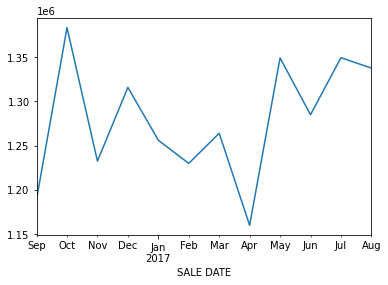

In [80]:
df['SALE PRICE'].resample('M').mean().plot()

### Visualizzazione statistica: la libreria *seaborn*

*seaborn* aggiunge a Pandas una vasta gamma di funzioni di visualizzazione statistica relativamente facili da usare. Qualche tutorial:

- https://seaborn.pydata.org/tutorial.html
- https://seaborn.pydata.org/examples/index.html
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html.

Vediamo qualche esempio.

In [81]:
import seaborn as sns

sns.__version__

'0.10.1'

La funzione *stripplot* mostra l'andamento di una variabile numerica (qui il prezzo) rispetto ad una categorica nominale (qui il borough di New York). Le funzioni seaborn accettano come argomenti i nomi delle colonne di un DataFrame.

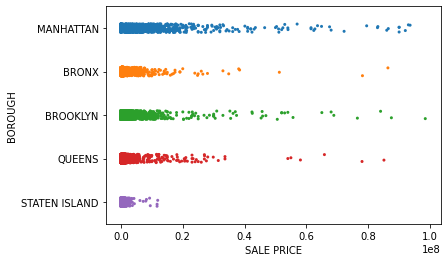

In [82]:
sns.stripplot('SALE PRICE', 'BOROUGH', data=df, size=3)

Realizziamo lo stesso grafico aggiungendo una terza dimensione: vogliamo distinguere tra proprietà *vecchie* (edificate prima del 1950) e nuove. Iniziamo creando una nuova colonna.

In [83]:
df['OLD PROPERTY'] = (df['YEAR BUILT'] < 1950).astype(str)

df[['YEAR BUILT', 'OLD PROPERTY']].head(10)

,YEAR BUILT,OLD PROPERTY
SALE DATE,,
2017-07-19,1900,True
2016-09-23,1913,True
2016-11-17,1900,True
2016-09-23,1920,True
2016-11-07,1920,True
2016-10-17,2009,False
2017-06-21,1928,True
2016-10-13,2005,False
2016-11-15,1910,True


In [84]:
df['OLD PROPERTY'].value_counts()

True     19208
False    10072
Name: OLD PROPERTY, dtype: int64

In [85]:
df.groupby(['BOROUGH'])['OLD PROPERTY'].value_counts()

BOROUGH        OLD PROPERTY
BRONX          True            2304
               False           1206
BROOKLYN       True            7110
               False           1552
MANHATTAN      True             838
               False            139
QUEENS         True            7666
               False           3402
STATEN ISLAND  False           3773
               True            1290
Name: OLD PROPERTY, dtype: int64

Quindi, coloriamo il grafico precedente in base ai valori della nuova colonna grazie all'argomento *hue* (tinta).

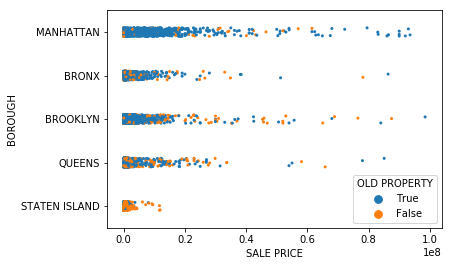

In [26]:
sns.stripplot('SALE PRICE', 'BOROUGH', data=df, hue='OLD PROPERTY', size=3)

La funzione *distplot* crea l'istogramma dei valori di una Series.

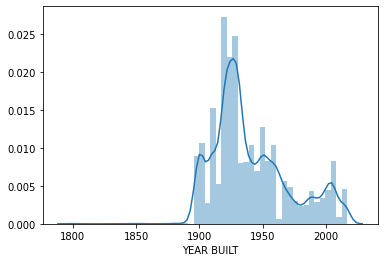

In [86]:
sns.distplot(df['YEAR BUILT'])

La funzione *jointplot* mostra l'andamento di due variabili numeriche. Nell'esempio qui sotto, analizziamo il comportamento del prezzo al variare dell'estensione (*GROSS SQUARE FEET*), per le sole proprietà di Manhattan.

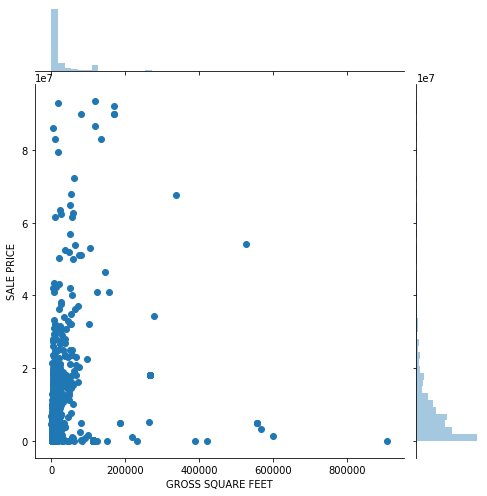

In [97]:
manhattan_props = df[df['BOROUGH'] == 'MANHATTAN']
sns.jointplot('GROSS SQUARE FEET',
              'SALE PRICE',
              data=manhattan_props,
              height=7)

Le proprietà molto grandi (più di 100K ft²) tendono a schiacchiare il grafico in verticale. Proviamo a escluderle.

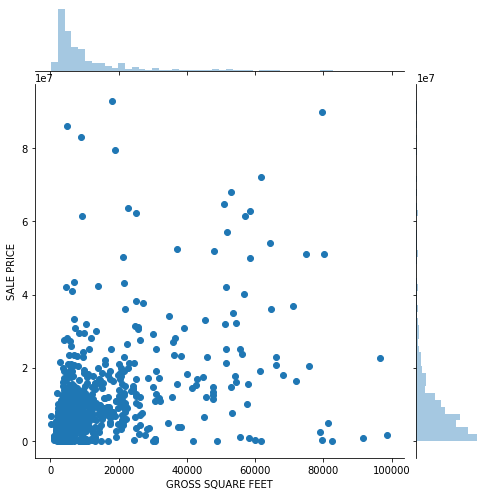

In [98]:
sns.jointplot('GROSS SQUARE FEET',
              'SALE PRICE',
              data=manhattan_props[manhattan_props['GROSS SQUARE FEET']<100_000],
              height=7)

Notiamo meglio la tendenza del prezzo a crescere all'aumentare dell'estensione.

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>